# Test Results Analysis
This Jupyter Notebook provides a comprehensive analysis of healthcare test results. It includes data cleaning, visualization, and statistical summaries. Key analyses include annual billing trends, yearly test result distributions, age and gender-based test result breakdowns, and medical condition-specific insights. Various visualization techniques such as bar charts, line plots, pie charts, and treemaps are used to present the findings effectively.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
# Loading the dataset
df = pd.read_csv('datasets/healthcare_dataset.csv')
# Cleaning column names (remove spaces, special characters)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [4]:
test_result = df.groupby('test_results').size()
test_result

test_results
Abnormal        18627
Inconclusive    18356
Normal          18517
dtype: int64

## 1. Annual Billing Amount by Test Results
This section analyzes the annual billing amounts categorized by test results. The data is grouped by test results and year, and the total billing amount is calculated for each group. A bar chart is used to visualize the billing trends over the years, with different colors representing the test result categories. The y-axis is formatted to display values in millions or thousands for better readability. Additionally, value labels are added on top of the bars to provide precise billing amounts for each category and year.

<b>Key Observations:</b>

1. <b>Total Billing Trends:</b>
    * Billing amounts remained relatively stable from 2019-2023, fluctuating between 91.1M -  
 91.1M and 96.4M
    * There was a significant drop in 2024 to approximately $32.8M (about 66% decrease from previous years)

2. <b>Breakdown by Test Results:</b>
    * Normal tests consistently accounted for the majority of billing (approximately $90M+ annually until 2024)
    * Abnormal tests represented a small portion (appears to be in the $1-2M range based on the small colored segments)
    * Inconclusive tests were an even smaller portion of billing

3. <b>2024 Anomaly:</b>
    * The dramatic drop in 2024 appears to affect all test result categories proportionally
    * Total billing fell to about one-third of previous years' levels

<b>Potential Insights</b>

1. <b>Data Quality Consideration:</b> The 2024 data may be incomplete (partial year) or there may have been a significant business change (contract loss, regulatory change, etc.)
2. <b>Revenue Concentration:</b> The business is heavily dependent on normal test results, with abnormal and inconclusive tests contributing minimally to revenue
3. <b>Stability:</b> The organization maintained remarkably consistent billing levels from 2019-2023 before the 2024 drop


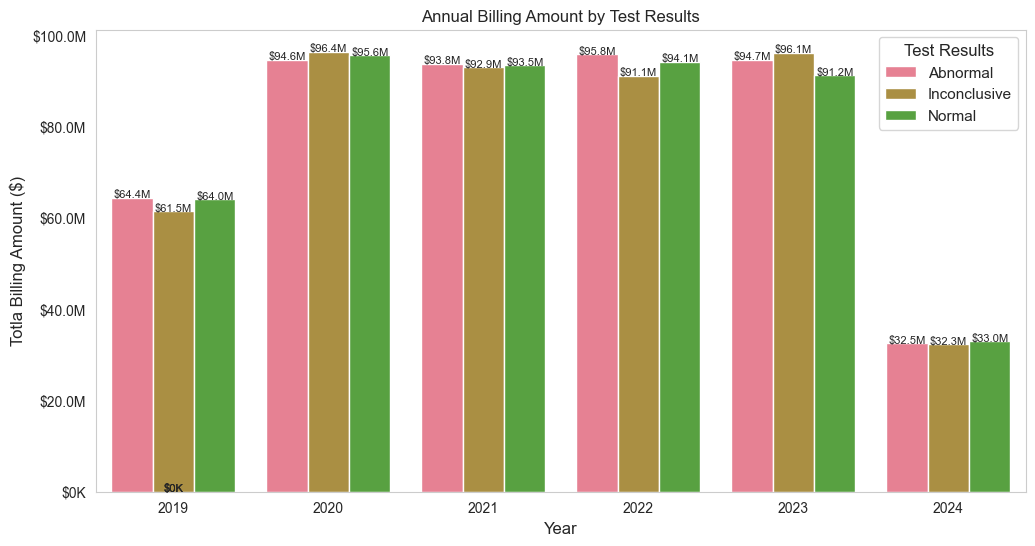

In [5]:
from matplotlib.ticker import FuncFormatter
df['Year'] = pd.to_datetime(df['date_of_admission']).dt.year
yearly_conditions = df.groupby(['Year', 'test_results']).size().reset_index(name='Count')


# Grouping by gender and year
annual_billing = df.groupby(['test_results', 'Year'])['billing_amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.set_palette('husl')

ax = sns.barplot(data=annual_billing,
                 x="Year",
                 y="billing_amount",
                 hue='test_results',
                 edgecolor='white',
                 width=0.8,
                 linewidth=1)
plt.title('Annual Billing Amount by Test Results')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Totla Billing Amount ($)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

# Formating the y-axis as currency
def currency_formatter(x, pos):
    return f"${x/1000000:,.1f}M" if x >= 1000000 else f"${x/1000:,.0f}K"
ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))

# Adjust legend
plt.legend(title='Test Results', fontsize=11, title_fontsize=12)
# Adding the value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 10000,
            f'${height/1000000:.1f}M' if height >= 1000000 else f'${height/1000:,.0f}K',
            ha="center", fontsize=8)

plt.show()

## 2. Plot yearly trends
This section visualizes yearly trends in test results using line plots, and treemaps. The analysis highlights the distribution and trends of test results (Normal, Abnormal, Inconclusive) from 2019 to 2024. Key insights include yearly test result counts, billing trends, and proportional distributions. Various visualization techniques are employed to provide a comprehensive understanding of the data.


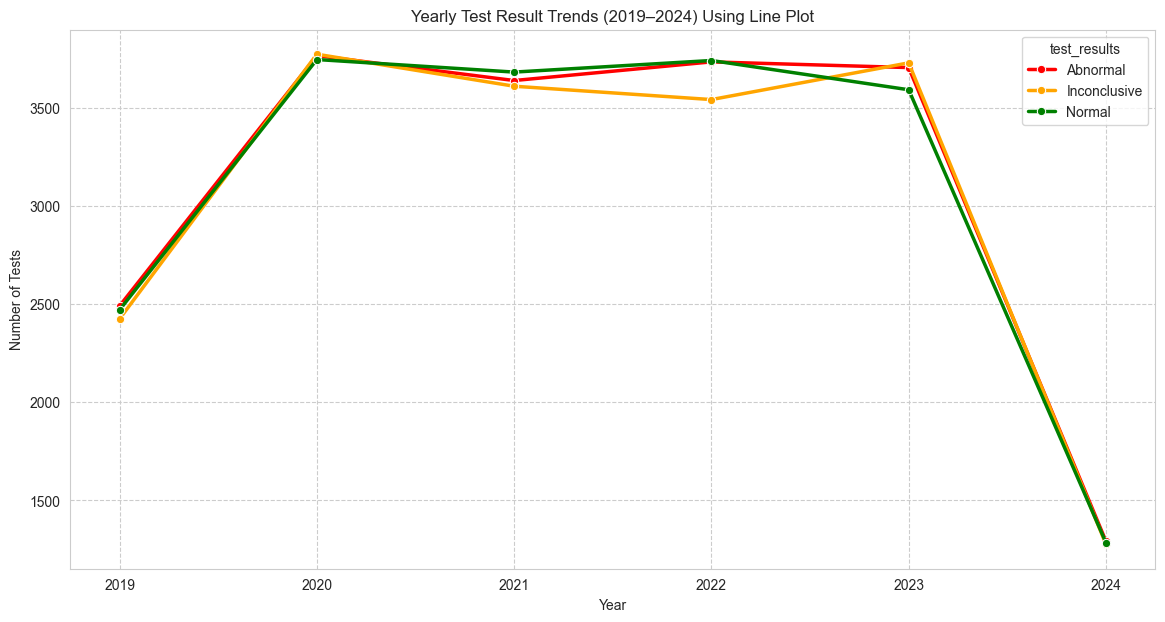

In [18]:
df_years = df[df['Year'].between(2019, 2024)]
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_years.groupby(['Year', 'test_results']).size().reset_index(name='Count'),
    x='Year',
    y='Count',
    hue='test_results',
    palette={'Normal': 'green', 'Abnormal': 'red', 'Inconclusive': 'orange'},
    marker='o',
    linewidth=2.5
)
plt.title('Yearly Test Result Trends (2019–2024) Using Line Plot')
plt.ylabel('Number of Tests')
plt.grid(True, linestyle='--')
plt.show()

### Yearly Trend of Test Results (2019–2024)

In [19]:
yearly_results = df.groupby(['Year', 'test_results']).size().reset_index(name='Count')

# Initializing the subplots (1 row, 3 columns for each test result type)
fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'treemap'}] * 3])

# Adding the treemaps for each test result
test_results = ['Normal', 'Abnormal', 'Inconclusive']
colors = {'Normal': 'green', 'Abnormal': 'red', 'Inconclusive': 'orange'}

for i, result in enumerate(test_results, 1):
    subset = yearly_results[yearly_results['test_results'] == result]
    fig.add_trace(
        go.Treemap(
            labels=subset['Year'].astype(str) + '<br>Count: ' + subset['Count'].astype(str),
            parents=[result] * len(subset),
            values=subset['Count'],
            marker_colors=[colors[result]] * len(subset),
            name=result,
            textinfo='label+value',
            hoverinfo='label+value+percent parent'
        ),
        row=1, col=i
    )

# Updating layout
fig.update_layout(
    title_text='Yearly Trend of Test Results (2019–2024) Using Treemap Charts',
    margin=dict(t=50, l=25, r=25, b=25),
    treemapcolorway=list(colors.values()),
    showlegend=False
)

fig.show()

### Create subplots
This section demonstrates the creation of subplots to visualize the yearly distribution of test results using pie charts. Each subplot represents a specific year, showcasing the proportion of Normal, Abnormal, and Inconclusive test results. The subplots are arranged in a 2x3 grid, covering the years 2019 to 2024. The pie charts are color-coded for easy interpretation, with green representing Normal, red for Abnormal, and orange for Inconclusive results. This visualization provides a clear and concise overview of the yearly trends in test result distributions.


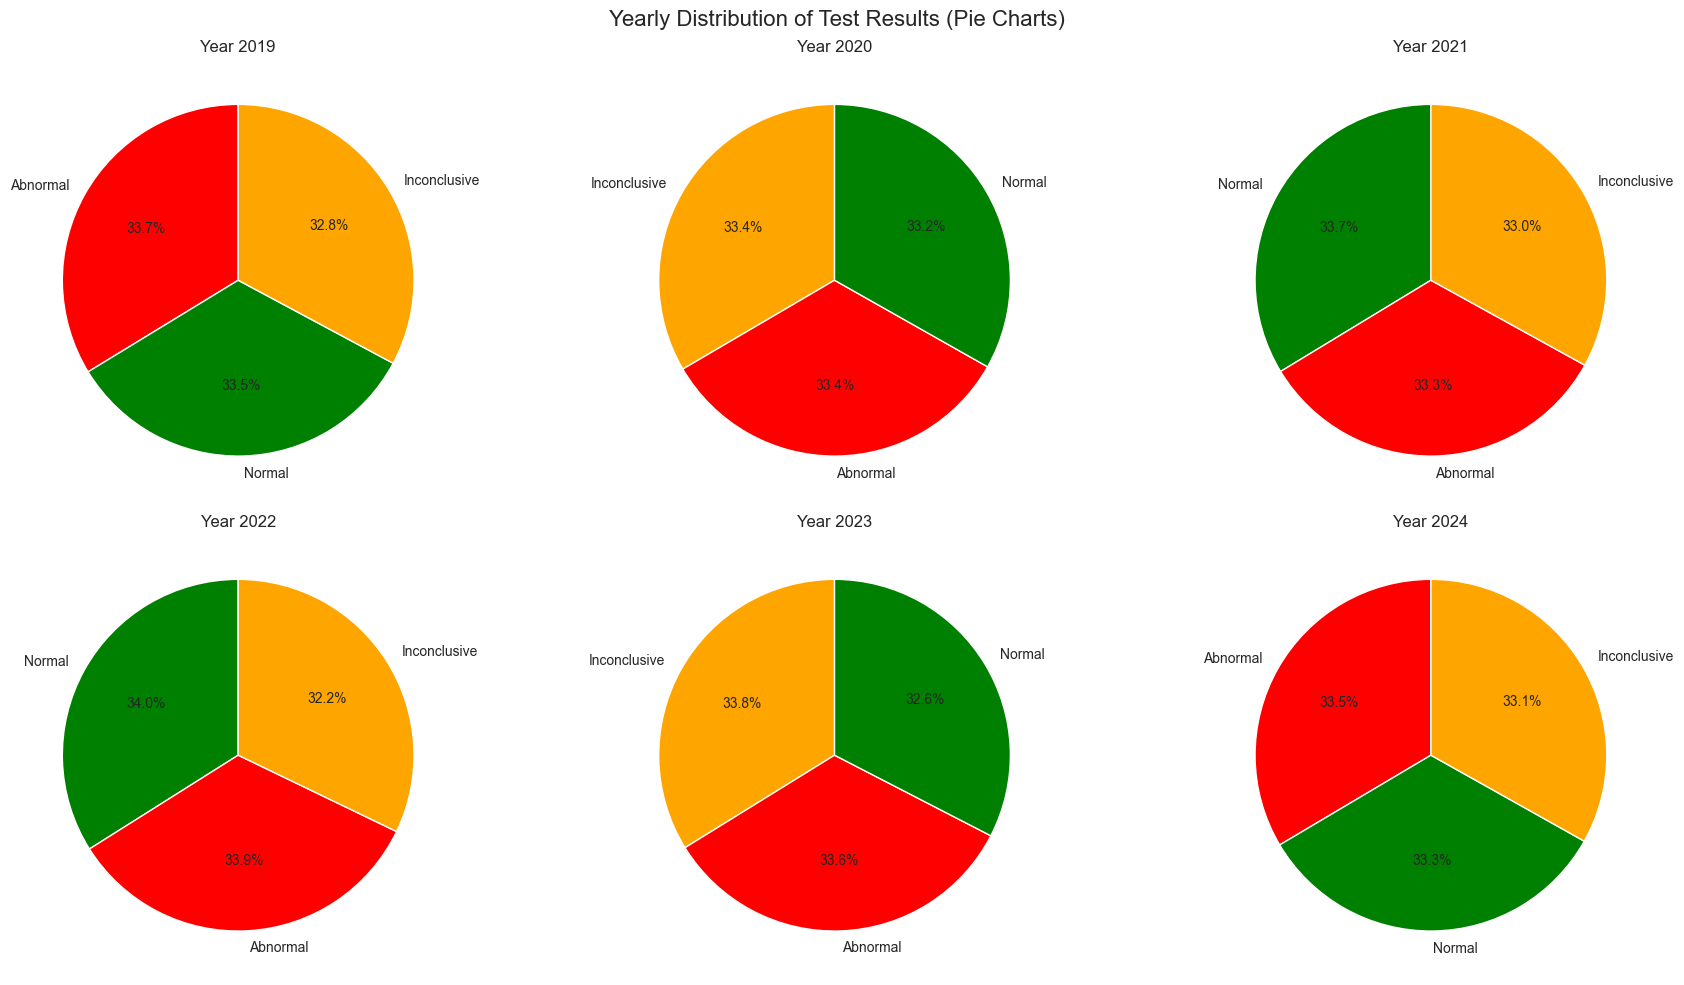

In [9]:
# 2 rows, 3 columns for 6 years
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  
fig.suptitle('Yearly Distribution of Test Results (Pie Charts)', fontsize=16)

# Plot pie charts for each year
years = sorted(df['Year'].unique())
colors = {'Normal': 'green', 'Abnormal': 'red', 'Inconclusive': 'orange'}

for i, year in enumerate(years):
    # Position in subplot grid
    ax = axes[i//3, i%3]  
    data = df[df['Year'] == year]['test_results'].value_counts()
    ax.pie(
        data, 
        labels=data.index, 
        autopct='%.1f%%', 
        colors=[colors[r] for r in data.index],
        startangle=90
    )
    ax.set_title(f'Year {year}')

plt.tight_layout()
plt.show()

## 4. Visualizing the test results analysis by age and gender

In the following sections, we will analyze the distribution of test results based on gender and age group. This analysis will be conducted through six different visualizations, each providing unique insights into the data:

1. **Test Results Distribution by Age Group**: A bar chart will be used to display the count of test results (Normal, Abnormal, Inconclusive) across different age groups.
2. **Test Results Distribution by Gender**: A bar chart will illustrate the distribution of test results for male and female patients.
3. **Combined Age and Gender Analysis**: A grouped bar chart will provide a detailed view of test results segmented by both age group and gender.
4. **Percentage Distribution by Age Group**: A bar chart will show the percentage distribution of test results within each age group, offering a proportional perspective.
5. **Top Medical Conditions Analysis**: A grouped bar chart will highlight the test results for the top five most common medical conditions.
6. **Age Distribution by Test Result**: A boxplot will visualize the age distribution for each test result category, providing insights into the age ranges associated with Normal, Abnormal, and Inconclusive results.

In [10]:
# Create age groups
bins = [18, 30, 50, 65, 85]
labels = ['18-30', '31-50', '51-65', '66+']
df['Age Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Set style
# plt.style.use('seaborn')
sns.set_palette("viridis")

### Function to display each plot

In [11]:
def plot_test_results(data, x, hue, title, xlabel, ylabel='Number of Cases', figsize=(12,6), rotation=0):
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=data, x=x, hue=hue)
    plt.title(title, fontsize=14, pad=20)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=rotation)
    plt.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Adding the value labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', 
                   (p.get_x() + p.get_width()/2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 5), 
                   textcoords='offset points')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

### a.) Test Results Distribution by Age Group (Normal Bar Chart)

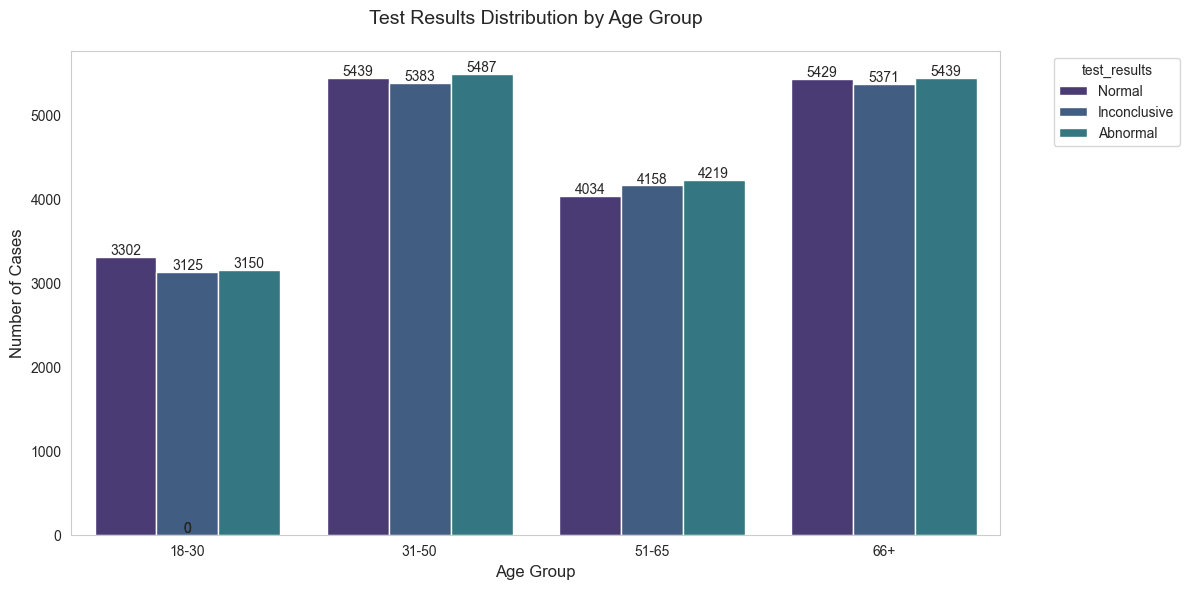

In [12]:
plot_test_results(df, x='Age Group', hue='test_results', 
                 title='Test Results Distribution by Age Group',
                 xlabel='Age Group')


### b.) Test Results by Gender (Normal Bar Chart)

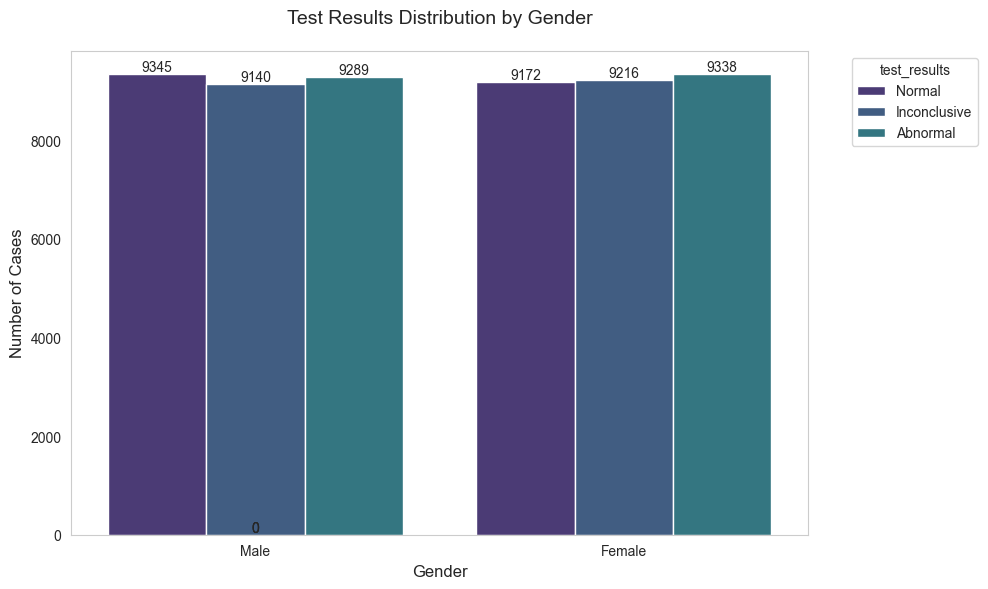

In [13]:
plot_test_results(df, x='gender', hue='test_results',
                 title='Test Results Distribution by Gender',
                 xlabel='Gender',
                 figsize=(10,6))

### c.) Combined Age & Gender Analysis (Grouped Bar Chart)

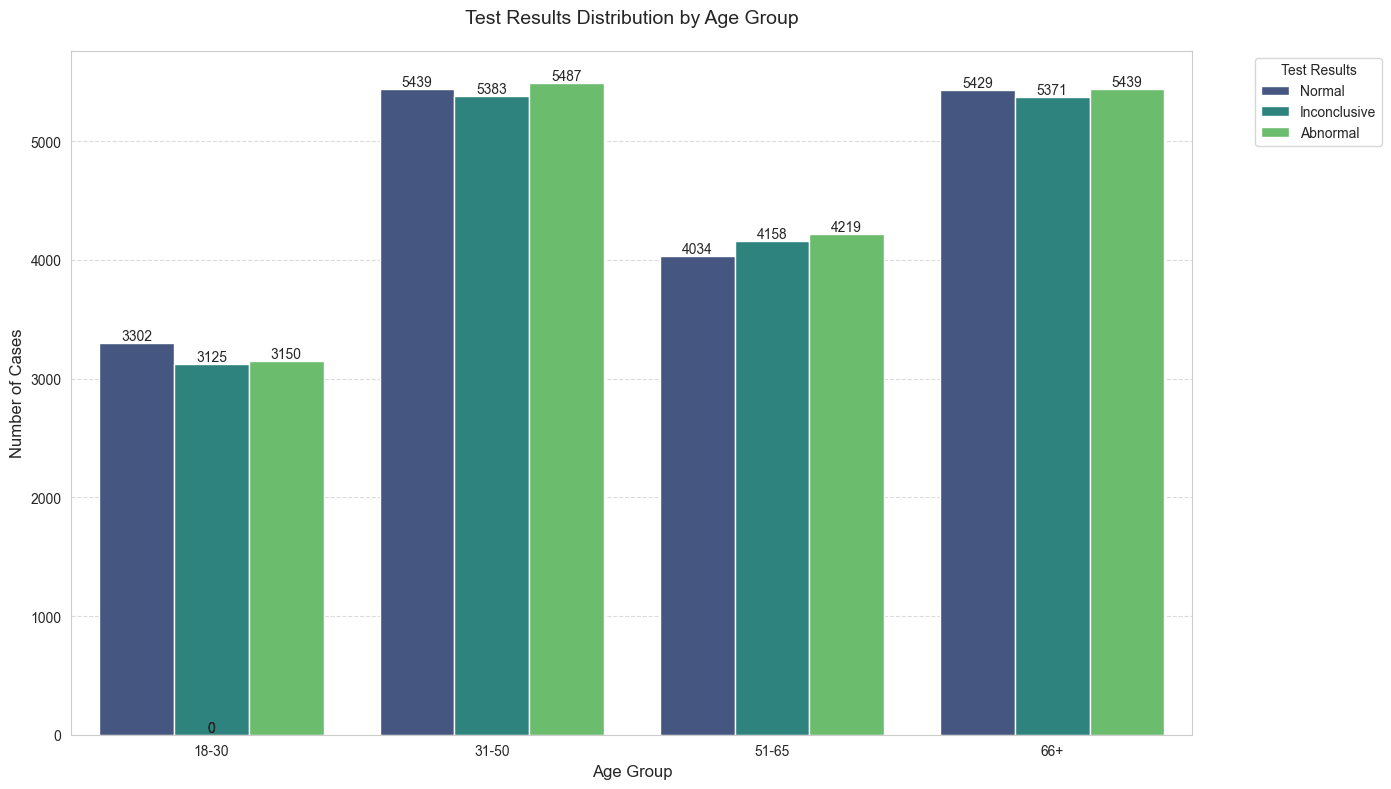

In [14]:
plt.figure(figsize=(14,8))
ax = sns.countplot(data=df, x='Age Group', hue='test_results', 
                  palette='viridis')
plt.title('Test Results Distribution by Age Group', fontsize=14, pad=20)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
# plt.xticks(rotation=45)
# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
               (p.get_x() + p.get_width()/2., p.get_height()), 
               ha='center', va='center', 
               xytext=(0, 5), 
               textcoords='offset points')

plt.legend(title='Test Results', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### d.) Percentage Distribution by Age Group (Normal Bar Chart)

<Figure size 1200x800 with 0 Axes>

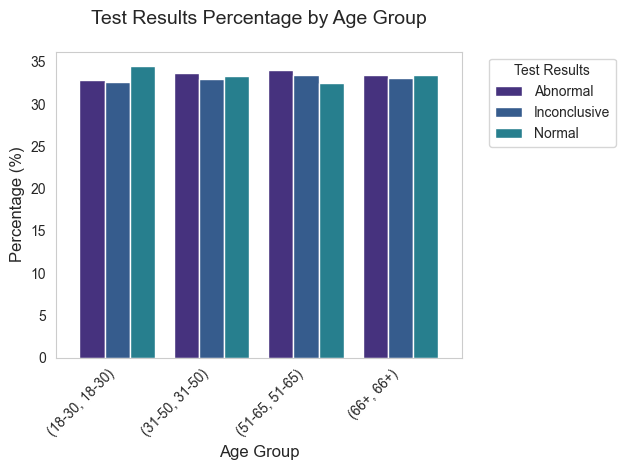

In [15]:
plt.figure(figsize=(12,8))
age_group_pct = df.groupby(['Age Group', 'test_results'], observed=True).size().groupby(level=0, observed=True).apply(
    lambda x: 100 * x / x.sum()).unstack()
age_group_pct.plot(kind='bar', width=0.8)
plt.title('Test Results Percentage by Age Group', fontsize=14, pad=20)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Age Group', fontsize=12)
plt.legend(title='Test Results', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()
plt.show()

### e.) Top Medical Conditions Analysis (Grouped Bar Chart)

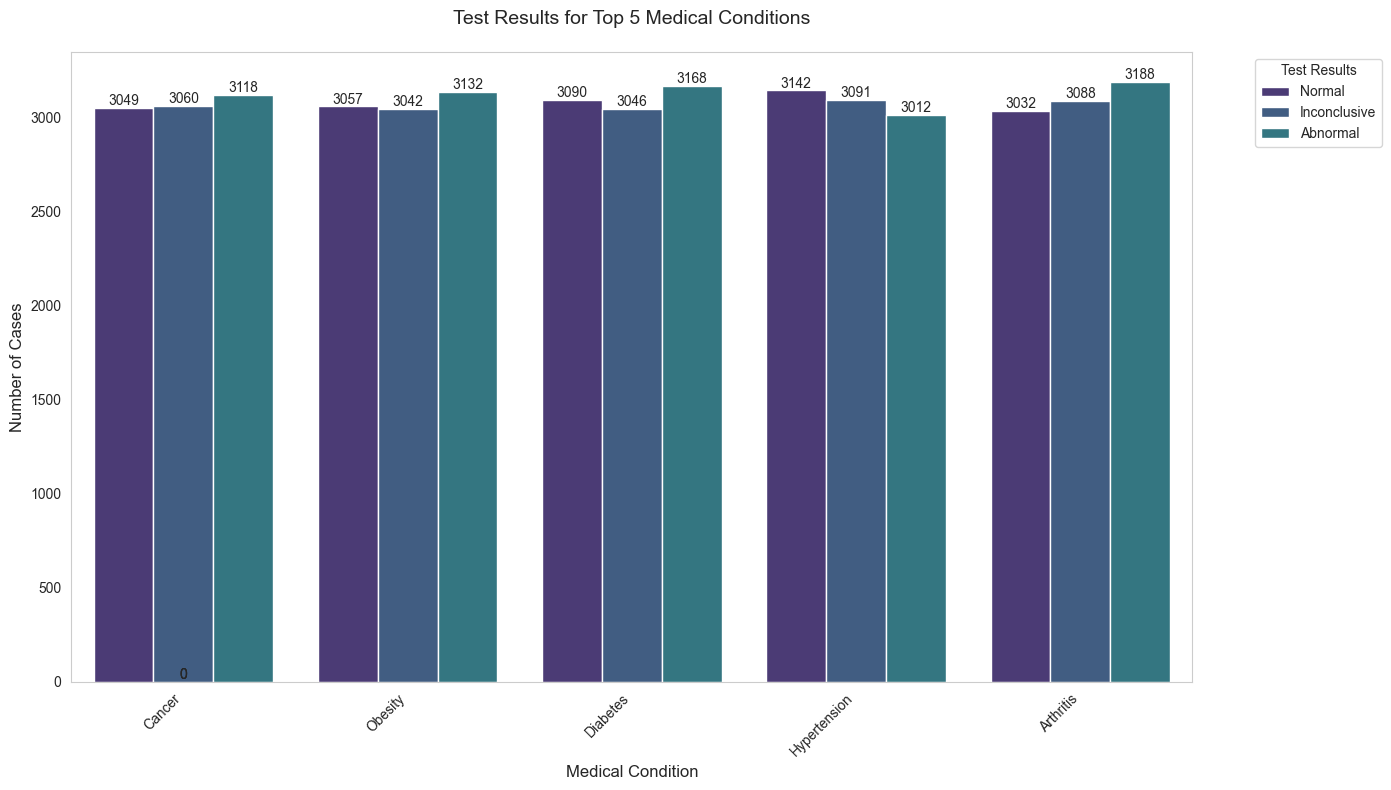

In [16]:
top_conditions = df['medical_condition'].value_counts().nlargest(5).index
condition_df = df[df['medical_condition'].isin(top_conditions)]

plt.figure(figsize=(14,8))
ax = sns.countplot(data=condition_df, x='medical_condition', hue='test_results')
plt.title('Test Results for Top 5 Medical Conditions', fontsize=14, pad=20)
plt.xlabel('Medical Condition', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adding the value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
               (p.get_x() + p.get_width()/2., p.get_height()), 
               ha='center', va='center', 
               xytext=(0, 5), 
               textcoords='offset points')

plt.legend(title='Test Results', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.grid(False)
plt.show()

### f.) Age Distribution by Test Result (Boxplot - kept as is for distribution view)

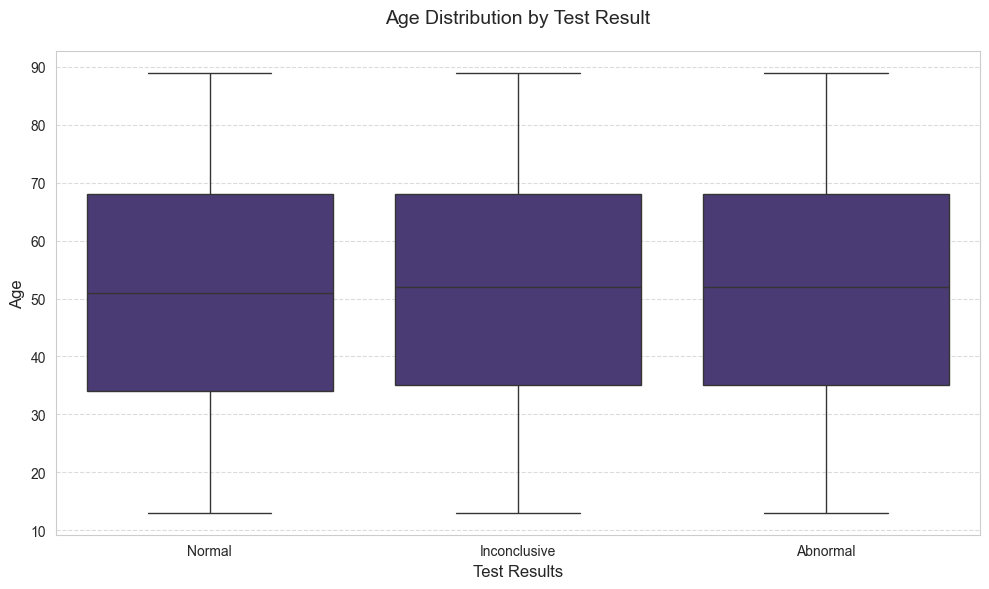

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='test_results', y='age', data=df)
plt.title('Age Distribution by Test Result', fontsize=14, pad=20)
plt.xlabel('Test Results', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()